In [1]:
import cf_xarray
import gribberish
import xarray as xr
import cfgrib

In [2]:
ds = xr.open_dataset('/Users/matthewiannucci/Downloads/gfs.t18z.pgrb2.0p25.f186.grib2', engine='gribberish')
ds

/Users/matthewiannucci/Developer/gribberish/python/examples/env/lib/python3.9/site-packages/xarray/backends/plugins.py:71: RuntimeWarning: Engine 'rasterio' loading failed:
dlopen(/Users/matthewiannucci/Developer/gribberish/python/examples/env/lib/python3.9/site-packages/rasterio/_version.cpython-39-darwin.so, 0x0002): Library not loaded: /opt/homebrew/opt/gdal/lib/libgdal.31.dylib
  Referenced from: <096C1844-80F2-3F2D-82B6-4FA692E96B85> /Users/matthewiannucci/Developer/gribberish/python/examples/env/lib/python3.9/site-packages/rasterio/_version.cpython-39-darwin.so
  Reason: tried: '/opt/homebrew/opt/gdal/lib/libgdal.31.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/gdal/lib/libgdal.31.dylib' (no such file), '/opt/homebrew/opt/gdal/lib/libgdal.31.dylib' (no such file), '/usr/local/lib/libgdal.31.dylib' (no such file), '/usr/lib/libgdal.31.dylib' (no such file, not in dyld cache), '/opt/homebrew/Cellar/gdal/3.6.2/lib/libgdal.31.dylib' (no such file), '/S

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
0
0
bscale 2
dscale 0.000000010000000000000002
refval 0
[1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]
2852
2853
-3091
bscale 1
dscale 0.01
refval -3355.352294921875
[1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0]
467
468
-652
bscale 1
dscale 0.1
refval -498.24444580078125
[1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1]
55
55
-243
bscale 1
dscale 0.1
refval 0.22778330743312836
[1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1]
3706
3708
-2443
bscale 1
dscale 0.01
refval -3464.271484375
[1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0]
950
950
-900
bscale 1
dscale 0.1
refval 50
[1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1]
3516
3514
-3471
bscale 1
dscale 0.01
refval -3568.72705078125
[1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0]
2452
2455
-2366
bscale 1
dscale 0.01
refval -2599.25830078125
[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0]
2256
2256
-2574
bscale 1
dscale 0.01
refval 22940
[1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 

<xarray.Dataset>
Dimensions:                                                                       (
                                                                                   time: 1,
                                                                                   lat: 721,
                                                                                   lon: 1440)
Coordinates:
  * time                                                                          (time) datetime64[ns] ...
  * lat                                                                           (lat) float64 ...
  * lon                                                                           (lon) float64 ...
Data variables: (12/72)
    APCP@hybridlevel_1                                                            (time, lat, lon) float64 ...
    VGRD@sigmalevel_1                                                             (time, lat, lon) float64 ...
    UGRD@maximumwindlevel_0                                                       (time, lat, lon) float64 ...
    GUST@groundorwater_0                                                          (time, lat, lon) float64 ...
    VGRD@specificaltitudeabovemeansealevel_2743                                   (time, lat, lon) float64 ...
    RH                                                                            (time, lat, lon) float64 ...
    ...                                                                            ...
    VGRD@tropopause_0                                                             (time, lat, lon) float64 ...
    RH@specifiedheightlevelaboveground_2                                          (time, lat, lon) float64 ...
    TMP@specificaltitudeabovemeansealevel_3658                                    (time, lat, lon) float64 ...
    PTEND                                                                         (time, lat, lon) float64 ...
    VGRD@specificaltitudeabovemeansealevel_1829                                   (time, lat, lon) float64 ...
    UGRD@specificaltitudeabovemeansealevel_2743                                   (time, lat, lon) float64 ...
Attributes:
    meta:     created with gribberish

In [3]:
gust = ds['GUST@groundorwater_0']
gust

<xarray.DataArray 'GUST@groundorwater_0' (time: 1, lat: 721, lon: 1440)>
[1038240 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2023-01-12T07:00:00
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
Attributes:
    standard_name:  GUST
    long_name:      windgust
    units:          ms-1
    crs:            EPSG:4326

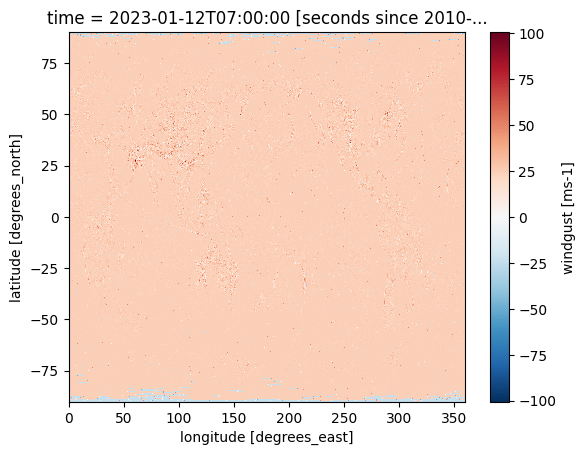

In [4]:
gust.plot()

In [4]:
ds_truth = xr.open_dataset('/Users/matthewiannucci/Downloads/gfs.t18z.pgrb2.0p25.f186.grib2', engine='cfgrib', filter_by_keys={'stepType': 'instant', 'typeOfLevel': 'surface'})
ds_truth

<xarray.Dataset>
Dimensions:     (latitude: 721, longitude: 1440)
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  datetime64[ns] ...
Data variables: (12/32)
    vis         (latitude, longitude) float32 ...
    gust        (latitude, longitude) float32 ...
    hindex      (latitude, longitude) float32 ...
    sp          (latitude, longitude) float32 ...
    orog        (latitude, longitude) float32 ...
    t           (latitude, longitude) float32 ...
    ...          ...
    cape        (latitude, longitude) float32 ...
    cin         (latitude, longitude) float32 ...
    4lftx       (latitude, longitude) float32 ...
    hpbl        (latitude, longitude) float32 ...
    lsm         (latitude, longitude) float32 ...
    siconc      (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2023-01-08T16:33 GRIB to CDM+CF via cfgrib-0.9.1...

In [5]:
gust_truth = ds_truth.gust
gust_truth

<xarray.DataArray 'gust' (latitude: 721, longitude: 1440)>
[1038240 values with dtype=float32]
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  datetime64[ns] ...
Attributes: (12/29)
    GRIB_paramId:                             260065
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Wind speed (gust)
    GRIB_shortName:                           gust
    GRIB_units:                               m s**-1
    long_name:                                Wind speed (gust)
    units:                                    m s**-1
    standard_name:                            unknown

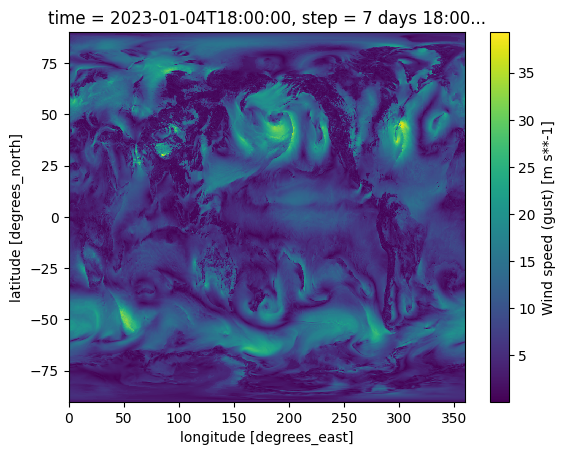

In [17]:
gust_truth.plot()

In [6]:
print(f'truth: {float(gust_truth.sel(latitude=41, longitude=-71, method="nearest").values)}')
print(f'compare: {float(gust.sel(lat=41, lon=-71, method="nearest").values)}')

truth: 10.422778129577637
compare: 20.822778330743315


In [7]:
gust.min().values

array(-49.57722167)

In [10]:
print(f'truth: {float(gust_truth.isel(latitude=0, longitude=1).values)}')
print(f'compa: {float(gust.isel(lat=0, lon=0).values)}')

truth: 5.522778511047363
compa: -0.7772216692566872
